# Exercise 02 : Compare models

In this exercise, we'll run multiple training with source code in [previous exercise](./01_track_logs.ipynb), and compare these models using MLflow API.

*back to [index](https://github.com/tsmatz/mlflow-azureml/)*

First, set AML workspace for MLflow tracking URI.

In [1]:
from azureml.core import Workspace
import mlflow

ws = Workspace.get(
    name = "<FILL-AML-WORKSPACE-NAME>",
    subscription_id = "<FILL-AZURE-SUBSCRIPTION-ID>",
    resource_group = "<FILL-RESOUCE-GROUP-NAME>")
tracking_uri = ws.get_mlflow_tracking_uri()
mlflow.set_tracking_uri(tracking_uri)

Set experiment name.

In [2]:
experimentName = "exercise02-sklearn-compare-model"
mlflow.set_experiment(experimentName)

2022/03/10 05:46:27 INFO mlflow.tracking.fluent: Experiment with name 'exercise02-sklearn-compare-model' does not exist. Creating a new experiment.


<Experiment: artifact_location='', experiment_id='eb03d001-45f2-4e9b-a0b2-8f621052856d', lifecycle_stage='active', name='exercise02-sklearn-compare-model', tags={}>

Build script for training.<br>
This source code is almost same as [previous exercise](./01_track_logs.ipynb).

In [3]:
import os
import sys

import pandas as pd
from sklearn.linear_model import ElasticNet
import mlflow

def train_model(alpha=0.5, l1_ratio=0.5):
    # Read the wine-quality csv file from the URL
    csv_url = (
        "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    )
    data = pd.read_csv(csv_url, sep=";")

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = data.drop(["quality"], axis=1)
    train_y = data[["quality"]]

    mlflow.sklearn.autolog()

    with mlflow.start_run() as my_run:
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

    print("completed training with alpha={} l1_ratio={}".format(alpha, l1_ratio))
    return my_run

Now let's start a lot of training iterations.<br>
Here we explore with the grid of parameters, in which ```alpha``` = 0.0, 0.2, ..., 1.0 and ```l1_ratio``` = 0.0, 0.2, ..., 1.0. (Total 36 iterations)

In [4]:
import warnings
import numpy as np

warnings.filterwarnings("ignore")

al_arr = np.linspace(0.0, 1.0, 6)
l1_arr = np.linspace(0.0, 1.0, 6)
al_grid, l1_grid = np.meshgrid(al_arr, l1_arr)
al_grid = al_grid.flatten()
l1_grid = l1_grid.flatten()
for i in range(6*6):
    train_model(alpha=al_grid[i], l1_ratio=l1_grid[i])

completed training with alpha=0.0 l1_ratio=0.0
completed training with alpha=0.2 l1_ratio=0.0
completed training with alpha=0.4 l1_ratio=0.0
completed training with alpha=0.6000000000000001 l1_ratio=0.0
completed training with alpha=0.8 l1_ratio=0.0
completed training with alpha=1.0 l1_ratio=0.0
completed training with alpha=0.0 l1_ratio=0.2
completed training with alpha=0.2 l1_ratio=0.2
completed training with alpha=0.4 l1_ratio=0.2
completed training with alpha=0.6000000000000001 l1_ratio=0.2
completed training with alpha=0.8 l1_ratio=0.2
completed training with alpha=1.0 l1_ratio=0.2
completed training with alpha=0.0 l1_ratio=0.4
completed training with alpha=0.2 l1_ratio=0.4
completed training with alpha=0.4 l1_ratio=0.4
completed training with alpha=0.6000000000000001 l1_ratio=0.4
completed training with alpha=0.8 l1_ratio=0.4
completed training with alpha=1.0 l1_ratio=0.4
completed training with alpha=0.0 l1_ratio=0.6000000000000001
completed training with alpha=0.2 l1_ratio=0.60

Extract all runs (36 runs) and show the results in pandas dataframe.

In [5]:
# get experiment
current_experiment=mlflow.get_experiment_by_name(experimentName)
# search all runs (36 runs) by experiment
all_runs = mlflow.search_runs(
    experiment_ids=current_experiment.experiment_id)
# show 3 columns
all_runs[[
    "params.alpha",
    "params.l1_ratio",
    "metrics.training_rmse"
]]

,params.alpha,params.l1_ratio,metrics.training_rmse
0,0.0,0.0,0.645575
1,0.2,0.0,0.684113
2,0.4,0.0,0.693969
3,0.6000000000000001,0.0,0.701352
4,0.8,0.0,0.707673
5,1.0,0.0,0.713216
6,0.0,0.2,0.645575
7,0.2,0.2,0.699793
8,0.4,0.2,0.711513
9,0.6000000000000001,0.2,0.725509


Show results with 3D plot (wireframe).

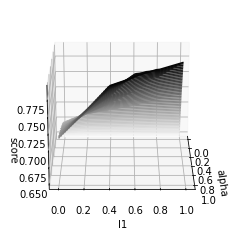

In [7]:
import matplotlib.pyplot as plt

x = all_runs[["params.alpha"]].to_numpy().flatten().astype(float)
x = np.reshape(x, (6, 6))
y = all_runs[["params.l1_ratio"]].to_numpy().flatten().astype(float)
y = np.reshape(y, (6, 6))
z = all_runs[["metrics.training_rmse"]].to_numpy().flatten().astype(float)
z = np.reshape(z, (6, 6))

ax = plt.axes(projection='3d')
ax.contour3D(
    x,
    y,
    z,
    50,
    cmap='binary')
ax.set_xlabel('alpha')
ax.set_ylabel('l1')
ax.set_zlabel('score')
ax.view_init(20, 0)
plt.draw()